Import Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Dataset

In [3]:
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.info

<bound method DataFrame.info of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]>

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [8]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


**Step 2: Data Visualization**

<Axes: xlabel='Outcome', ylabel='count'>

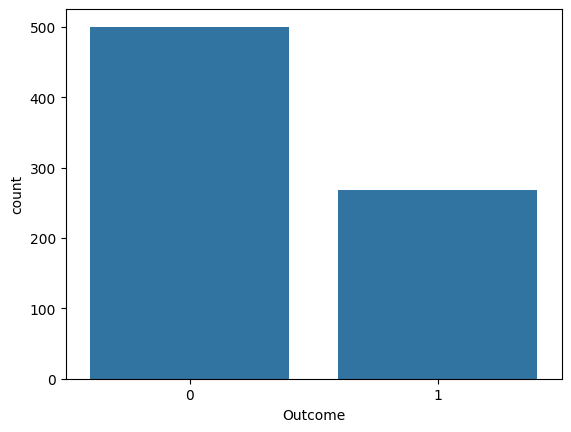

In [9]:
sns.countplot(x = 'Outcome',data = df)

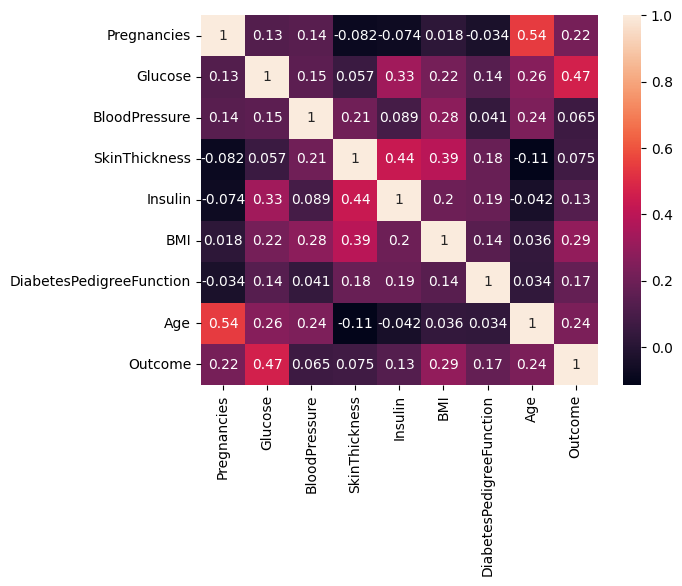

In [12]:
sns.heatmap(df.corr(), annot = True)
plt.show()

Data Preprocessing

In [15]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
df_sc=sc.fit_transform(df)

In [16]:
df_sc=pd.DataFrame(df_sc,columns=df.columns)
df_sc.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1.0
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0.0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1.0
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0.0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1.0


In [17]:
X=df_sc.iloc[:,[1,4,5,7]].values
y=df_sc.iloc[:,8].values

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.7532467532467533


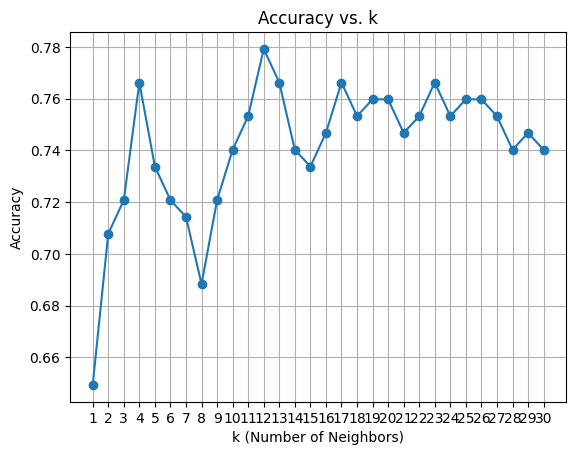

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
X_axis = list(range(1, 31))
acc = pd.Series(dtype=float)


for i in X_axis:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)  # Fit the model
    y_pred = knn.predict(X_test)  # Predict on test data
    acc[i] = accuracy_score(y_test, y_pred)  # Store accuracy

# Plot accuracy vs. k
plt.plot(X_axis, acc, marker='o')
plt.xticks(X_axis)  # Set x-axis ticks to all k values
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. k')
plt.grid(True)
plt.show()


In [28]:
from sklearn.svm import SVC
svc=SVC(kernel='linear',random_state=42)
svc.fit(X_train,y_train)

SVC(kernel='linear', random_state=42)

In [29]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

In [30]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
dt=DecisionTreeClassifier(criterion='entropy',random_state=42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [38]:
y_pred_lr=lr.predict(X_test)
y_pred_knn=knn.predict(X_test)
y_pred_svc=svc.predict(X_test)
y_pred_nb = nb.predict(X_test)
y_pred_dt = dt.predict(X_test)

In [39]:
from sklearn.metrics import accuracy_score
accuracy_lr = accuracy_score(y_test, y_pred_lr)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
accuracy_dt = accuracy_score(y_test, y_pred_dt)# You will need to check y_pred_dt as well since dt is called dectree in the previous cell

In [40]:
print(f"Accuracy of Logistic Regression: {accuracy_lr:.2f}")
print(f"Accuracy of k-Nearest Neighbors: {accuracy_knn:.2f}")
print(f"Accuracy of Support Vector Classifier: {accuracy_svc:.2f}")
print(f"Accuracy of Naive Bayes: {accuracy_nb:.2f}")
print(f"Accuracy of Decision Tree: {accuracy_dt:.2f}")

Accuracy of Logistic Regression: 0.75
Accuracy of k-Nearest Neighbors: 0.74
Accuracy of Support Vector Classifier: 0.75
Accuracy of Naive Bayes: 0.75
Accuracy of Decision Tree: 0.69


In [42]:
from sklearn.metrics import confusion_matrix
cm_lr=confusion_matrix(y_test,y_pred_lr)
cm_lr

array([[84, 15],
       [23, 32]])

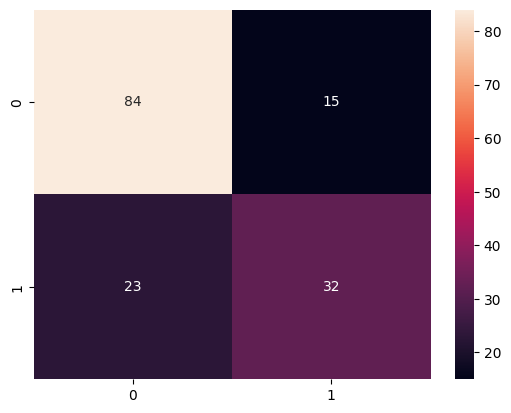

In [43]:
sns.heatmap(cm_lr,annot=True)
plt.show()

In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

         0.0       0.79      0.85      0.82        99
         1.0       0.68      0.58      0.63        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154

